# Candidate Test 2022 Analysis Part 2

This exercise focuses on the candidate tests from two television networks: DR and TV2. Data from both tests have been given on a scale of five responses (-2, -1, 0, 1, 2). Consider normalizing the data or performing similar scaling transformations as needed.

---

There are 6 datasets included in this exercise:

- `alldata.xlsx`: Contains responses from both TV stations.
- `drdata.xlsx`: Contains responses from DR.
- `drq.xlsx`: Contains questions from DR.
- `tv2data.xlsx`: Contains responses from TV2.
- `tv2q.xlsx`: Contains questions from TV2.
- `electeddata.xlsx`: Contains responses from both TV stations for candidates who were elected to the parliament. Note that 9 members are missing; 7 of them didn't take any of the tests. Additionally, some notable figures like Mette F. and Lars Løkke did not participate in any of the tests.

---

It's entirely up to you how you approach this data, but at a *minimum*, your analysis should include:

- An analysis/description of which questions are most crucial concerning their placement on the axes.
- Average positions of parties concerning each question, preferably with accompanying plots of each (or selected) question.
- A clustering analysis where you attempt various cluster numbers, which would correspond to different parties. Discuss whether there is room for more clusters/parties or if a reduction is needed. Make sure you cover: **K-Means, Hierarchical clustering, and DBSCAN.**
- An overview of the political landscape of the elected candidates, highlighting which members agree or disagree the most and which parties or party members have significant disagreements.
- Feel free to explore further and remember that preprocessing, methodology, and evaluation metrics are not mentioned explicitly, but are implicitly assumed.

---

The following parties are represented:

| Party letter | Party name | Party name (English) | Political position |
| :-: | :-: | :-: | :-: |
| A | Socialdemokratiet | Social Democrats | Centre-left |
| V | Venstre | Danish Liberal Party | Centre-right |
| M | Moderaterne | Moderates | Centre-right |
| F | Socialistisk Folkeparti | Socialist People's Party | Left-wing |
| D | Danmarksdemokraterne | Denmark Democrats | Right-wing |
| I | Liberal Alliance | Liberal Alliance | Right-wing |
| C | Konservative | Conservative People's Party | Right-wing |
| Æ | Enhedslisten | Red-Green Alliance | Far-left |
| B | Radikale Venstre | Social Liberal Party | Centre-left |
| D | Nye Borgerlige | New Right | Far-right |
| Z | Alternativet | The Alternative | Centre-left |
| O | Dansk Folkeparti | Danish People's Party | Far-right |
| G | Frie Grønne | Free Greens | Centre-left |
| K | Kristendemokraterne | Christian Democrats | Centre-right |

Below you can see the results and the colors chosen to represent the parties. Use these colors in your analysis above.

![Alt text](image-1.png)


Others have undertaken similar analyses. You can draw inspiration from the following (use Google tranlsate if your Danish is rusty):

- [Analysis of where individual candidates stand relative to each other and their parties](https://v2022.dumdata.dk/)
- [Candidate Test 2022 – A deep dive into the data](https://kwedel.github.io/kandidattest2022/)
- [The Political Landscape 2019](https://kwedel.github.io/kandidattest2019/)



In [2]:
import openpyxl as opxl
import pandas as pd

data = pd.read_excel("alldata.xlsx", engine="openpyxl")
data = data.dropna()

data = data.drop(columns=['storkreds', 'alder'], errors='ignore')
data

,530,531,533,534,535,537,538,540,541,543,...,8a,8b,9a,9b,10a,10b,11a,11b,12a,12b
0,-1,-2,1,-2,2,1,-2,1,1,2,...,1,0,2,0,1,-2,-2,1,1,1
1,2,2,-1,-2,-1,-2,1,-2,2,-2,...,0,0,-2,0,-1,2,1,-2,0,0
2,2,1,-2,-2,1,-2,1,-1,1,-1,...,1,1,-1,-2,0,2,0,-1,1,-2
3,2,1,-2,-1,1,1,1,1,1,-2,...,2,2,-2,2,2,2,2,-1,2,0
4,1,1,-2,2,-2,1,-2,1,2,-2,...,1,0,-2,0,-1,0,-2,0,2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,1,1,-2,2,-1,1,-2,1,1,...,2,1,1,2,-1,2,1,-2,0,0
863,1,-2,-2,-2,1,-2,-1,-2,-2,-2,...,1,0,-1,0,-1,2,2,-2,0,0
864,1,1,1,-2,2,-1,1,-1,-1,1,...,1,0,-1,0,-1,2,2,-2,0,1
865,1,-1,1,-2,1,-1,-1,-1,-1,1,...,0,0,0,0,0,2,1,-2,1,0


In [3]:
from sklearn import preprocessing

columns_to_scale = [col for col in data.columns if col not in ['parti', 'navn']]

scaler = preprocessing.StandardScaler()
questions_data = scaler.fit_transform(data[columns_to_scale])
questions_data = pd.DataFrame(questions_data, columns=columns_to_scale)

questions_data.head()

,530,531,533,534,535,537,538,540,541,543,...,8a,8b,9a,9b,10a,10b,11a,11b,12a,12b
0,-0.969068,-1.050586,0.974411,-0.626725,0.776943,0.730695,-0.770004,0.387687,0.824485,1.221737,...,-0.104115,-0.573668,1.660264,0.035293,0.412750,-1.465489,-0.864900,0.256268,0.333407,1.164317
1,1.140176,1.426255,-0.334364,-0.626725,-1.441310,-1.214584,1.482842,-1.585649,1.461587,-1.400159,...,-1.307690,-0.573668,-1.177486,0.035293,-1.206501,1.011273,1.170942,-1.616075,-0.639872,0.345612
2,1.140176,0.807044,-0.988752,-0.626725,0.037525,-1.214584,1.482842,-0.927870,0.824485,-0.744685,...,-0.104115,0.473427,-0.468049,-1.938816,-0.396875,1.011273,0.492328,-0.991961,0.333407,-1.291797
3,1.140176,0.807044,-0.988752,0.094883,0.037525,0.730695,1.482842,0.387687,0.824485,-1.400159,...,1.099459,1.520523,-1.177486,2.009401,1.222376,1.011273,1.849556,-0.991961,1.306686,0.345612
4,0.437094,0.807044,-0.988752,2.259705,-2.180728,0.730695,-0.770004,0.387687,1.461587,-1.400159,...,-0.104115,-0.573668,-1.177486,0.035293,-1.206501,-0.227108,-0.864900,-0.367846,1.306686,-1.291797


In [4]:
from sklearn import decomposition

pca4 = decomposition.PCA(n_components=None)
data_transformed = pca4.fit_transform(questions_data)
pca4.explained_variance_ratio_

array([0.41737636, 0.10259865, 0.04976015, 0.04300927, 0.0293233 ,
       0.0237033 , 0.01994712, 0.01697463, 0.01676652, 0.01608279,
       0.01527152, 0.01449084, 0.01303718, 0.01297392, 0.01200226,
       0.01125725, 0.0102922 , 0.00997773, 0.00986747, 0.00966786,
       0.00928391, 0.0089641 , 0.00877818, 0.00786085, 0.00755989,
       0.00722701, 0.00682415, 0.00670982, 0.00626662, 0.00605007,
       0.00582534, 0.0055948 , 0.0052595 , 0.00505699, 0.00473416,
       0.00466639, 0.00453667, 0.00416406, 0.00398844, 0.00388108,
       0.00341904, 0.00330379, 0.0029882 , 0.00290354, 0.00251036,
       0.00244041, 0.00210387, 0.00141116, 0.00130729])

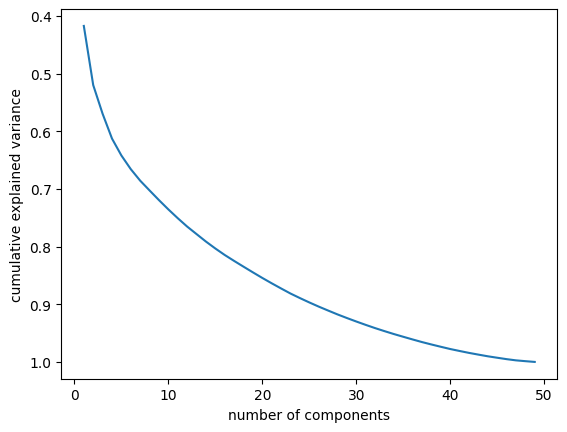

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = list(range(1, 1 + len(pca4.explained_variance_ratio_)))
plt.plot(x, np.cumsum(pca4.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.gca().invert_yaxis()
plt.show()

In [6]:
loadings = pca4.components_

loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=columns_to_scale)

for i in range(2):
    print(f"Top questions for PC{i+1}:")
    print(loadings_df.iloc[:, i].abs().sort_values(ascending=False).head())
    print("\n")

Top questions for PC1:
530    0.190641
537    0.190284
4a     0.188849
3b     0.188778
550    0.188555
Name: PC1, dtype: float64


Top questions for PC2:
10b    0.302918
556    0.297979
551    0.293836
553    0.272808
4b     0.258449
Name: PC2, dtype: float64




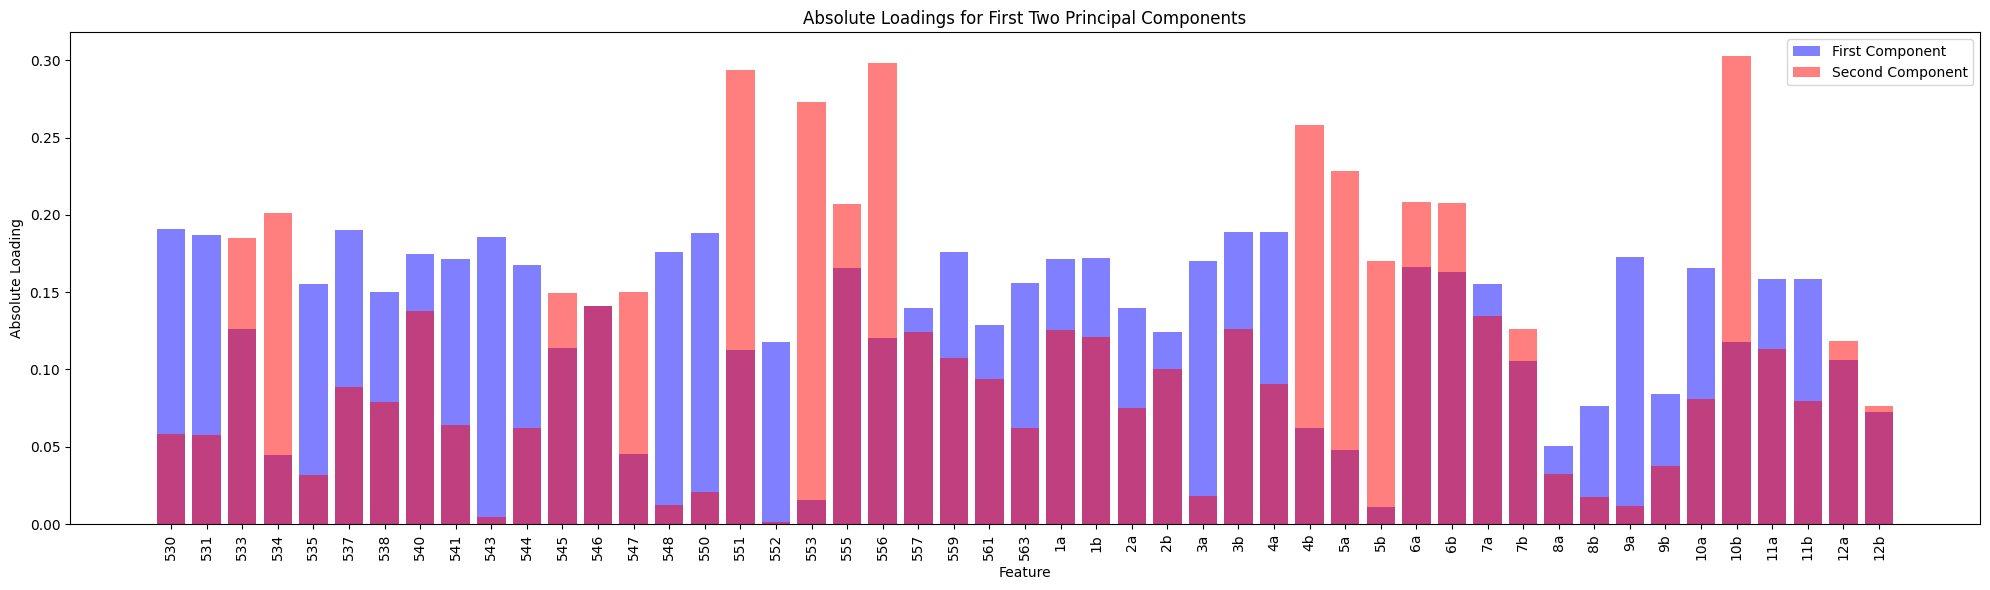

In [7]:
questions = [col for col in data.columns if col not in ['parti', 'navn']]

plt.figure(figsize=(20, 6))

plt.bar(np.arange(len(questions)), np.abs(pca4.components_[0]), color='b', alpha=0.5, label='First Component')

plt.bar(np.arange(len(questions)), np.abs(pca4.components_[1]), color='r', alpha=0.5, label='Second Component')

plt.xticks(np.arange(len(questions)), questions, rotation=90)

plt.xlabel("Feature")
plt.ylabel("Absolute Loading")
plt.title("Absolute Loadings for First Two Principal Components")
plt.legend()
plt.tight_layout()

plt.show()

In [8]:
data = data.drop('navn', axis=1, errors='ignore')
party_means = data.groupby('parti').mean()
party_means = party_means.drop(columns='parti', errors='ignore')
party_means.head()

,530,531,533,534,535,537,538,540,541,543,...,8a,8b,9a,9b,10a,10b,11a,11b,12a,12b
parti,,,,,,,,,,,,,,,,,,,,,
Alternativet,1.880597,1.134328,-1.895522,-1.820896,-0.776119,-1.641791,-0.716418,0.283582,1.149254,-1.432836,...,1.268657,1.134328,-1.477612,0.164179,-0.149254,1.029851,0.164179,0.492537,0.492537,-0.671642
Danmarksdemokraterne,-0.837838,-1.378378,1.513514,-0.972973,1.756757,0.189189,-1.864865,1.054054,-1.918919,0.972973,...,1.000000,0.729730,0.567568,-0.702703,0.918919,1.918919,-1.972973,1.891892,0.486486,0.297297
Dansk Folkeparti,-0.571429,-1.081633,1.551020,1.653061,1.551020,0.000000,-1.551020,0.734694,-1.448980,0.510204,...,0.979592,0.489796,0.816327,-0.306122,0.918367,1.448980,-1.693878,1.795918,0.816327,-0.693878
Det Konservative Folkeparti,-0.836735,-1.877551,0.948980,-1.714286,1.816327,1.408163,-1.979592,1.663265,-1.255102,1.397959,...,1.142857,0.275510,0.500000,-0.295918,1.469388,-1.612245,-1.806122,1.806122,0.765306,-0.295918
Enhedslisten,1.959459,1.864865,-1.918919,0.405405,-1.662162,-1.878378,0.418919,-1.797297,1.635135,-1.783784,...,0.824324,0.445946,-1.824324,0.283784,-1.040541,1.905405,0.702703,-1.162162,-0.554054,0.108108


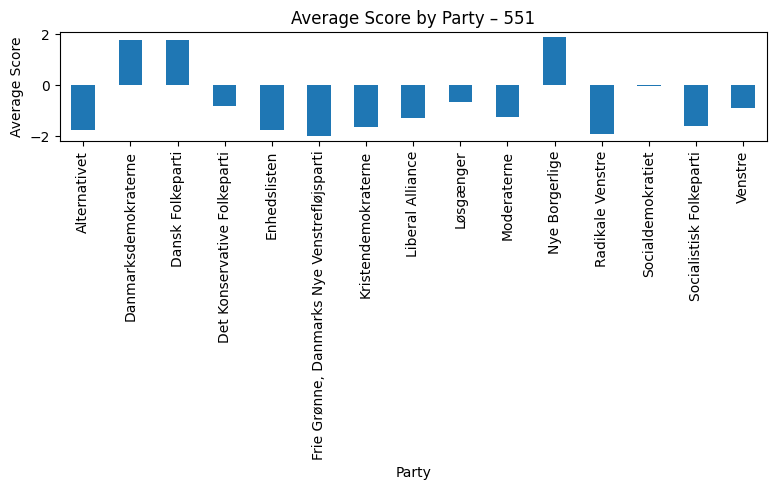

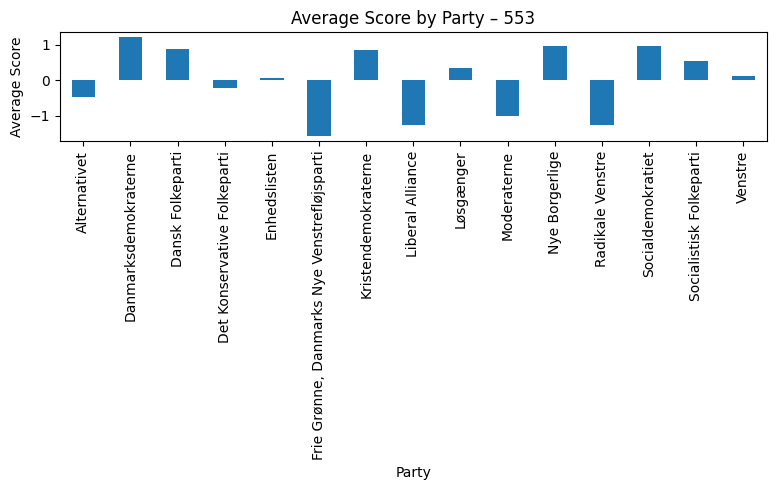

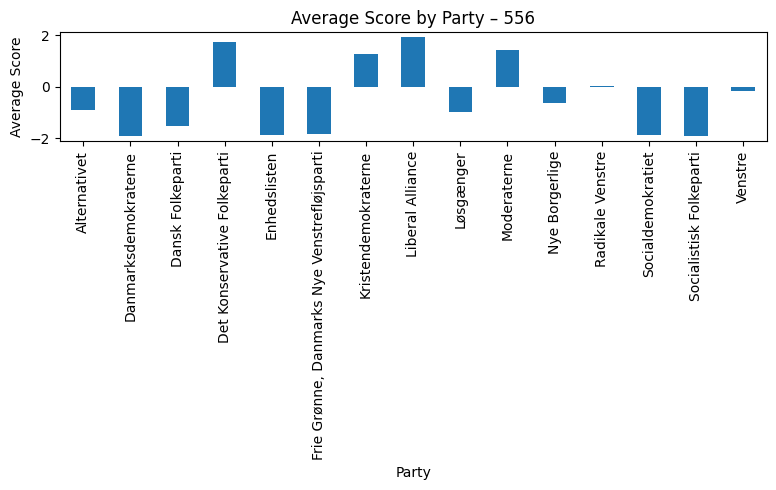

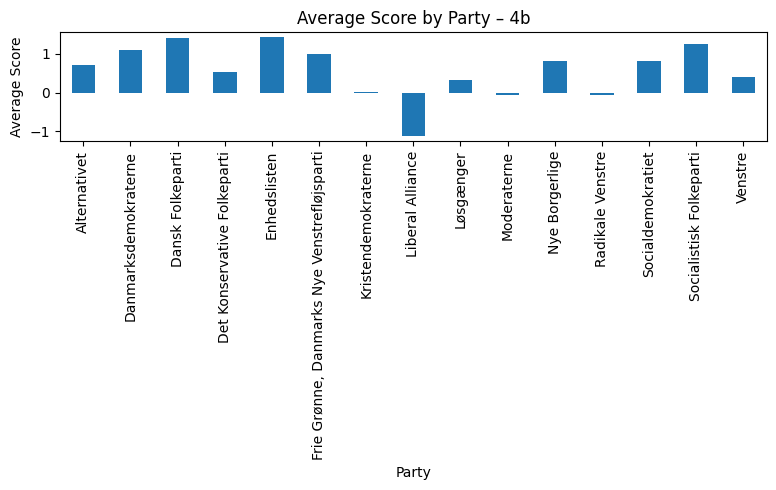

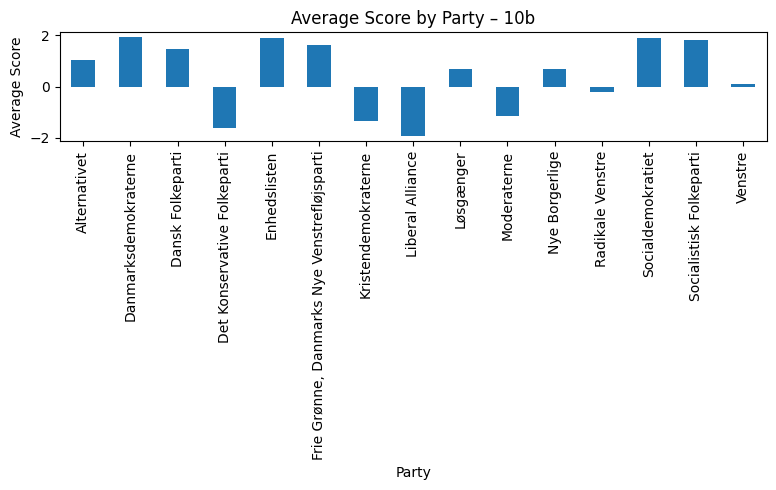

In [9]:
import matplotlib.pyplot as plt

selected_columns = ['551', '553', '556', '4b', '10b']
subset = party_means[selected_columns]

for col in subset.columns:
    plt.figure(figsize=(8, 5))
    subset[col].plot(kind='bar')
    plt.title(f'Average Score by Party – {col}')
    plt.ylabel('Average Score')
    plt.xlabel('Party')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

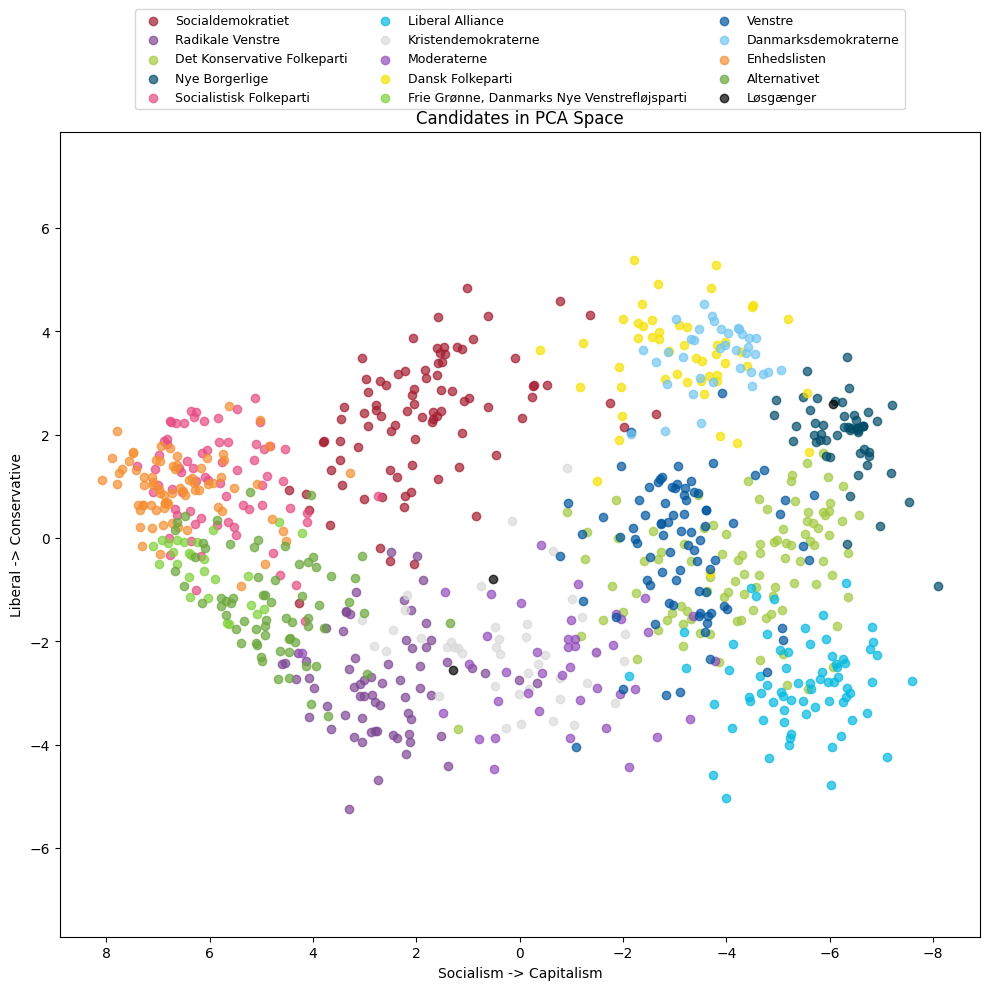

In [10]:
plt.figure(figsize=(10, 10))

party_colors_hex = {
    'Socialdemokratiet': '#A51C30',
    'Radikale Venstre': '#7E4894',
    'Det Konservative Folkeparti': '#A3C940',
    'Nye Borgerlige': '#024C68',
    'Socialistisk Folkeparti': '#E64C84',
    'Liberal Alliance': '#03B9E1',
    'Kristendemokraterne': '#DADADA',
    'Moderaterne': '#934DBD',
    'Dansk Folkeparti': '#F6E200',
    'Frie Grønne, Danmarks Nye Venstrefløjsparti': '#7FD13B',
    'Venstre': '#00569F',
    'Danmarksdemokraterne': '#72C6F2',
    'Enhedslisten': '#F58F32',
    'Alternativet': '#6AA73B',
    'Løsgænger': '#000000'
}

party_labels = data['parti']

for party, color in party_colors_hex.items():
    mask = party_labels == party
    plt.scatter(data_transformed[mask, 0], data_transformed[mask, 1], label=party, c=color, alpha=0.7)    

plt.xlabel("Socialism -> Capitalism")
plt.ylabel("Liberal -> Conservative")
plt.title("Candidates in PCA Space")
plt.gca().invert_xaxis()
plt.gca().set_aspect('equal', adjustable='datalim')

plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.02), ncol=3, fontsize=9)

plt.tight_layout()
plt.show()

# K-means

In [22]:
pca4 = decomposition.PCA(n_components=10)
data_transformed = pca4.fit_transform(questions_data)
pca4.explained_variance_ratio_
total_explained_variance = np.sum(pca4.explained_variance_ratio_)
print(f"Total explained variance by 10 PCs: {total_explained_variance:.4f}")

Total explained variance by 10 PCs: 0.7355


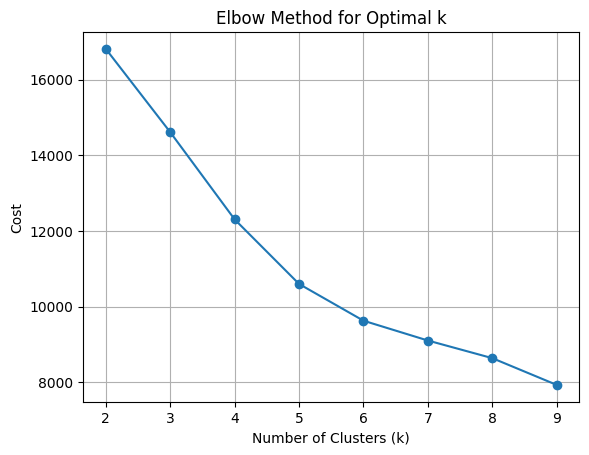

In [23]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

costs = []
ks = range(2,10)
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_transformed)
    costs.append(kmeans.inertia_)

plt.plot(ks, costs, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal k')
plt.xticks(np.arange(min(ks), max(ks)+1, 1.0))
plt.grid(True)
plt.show()

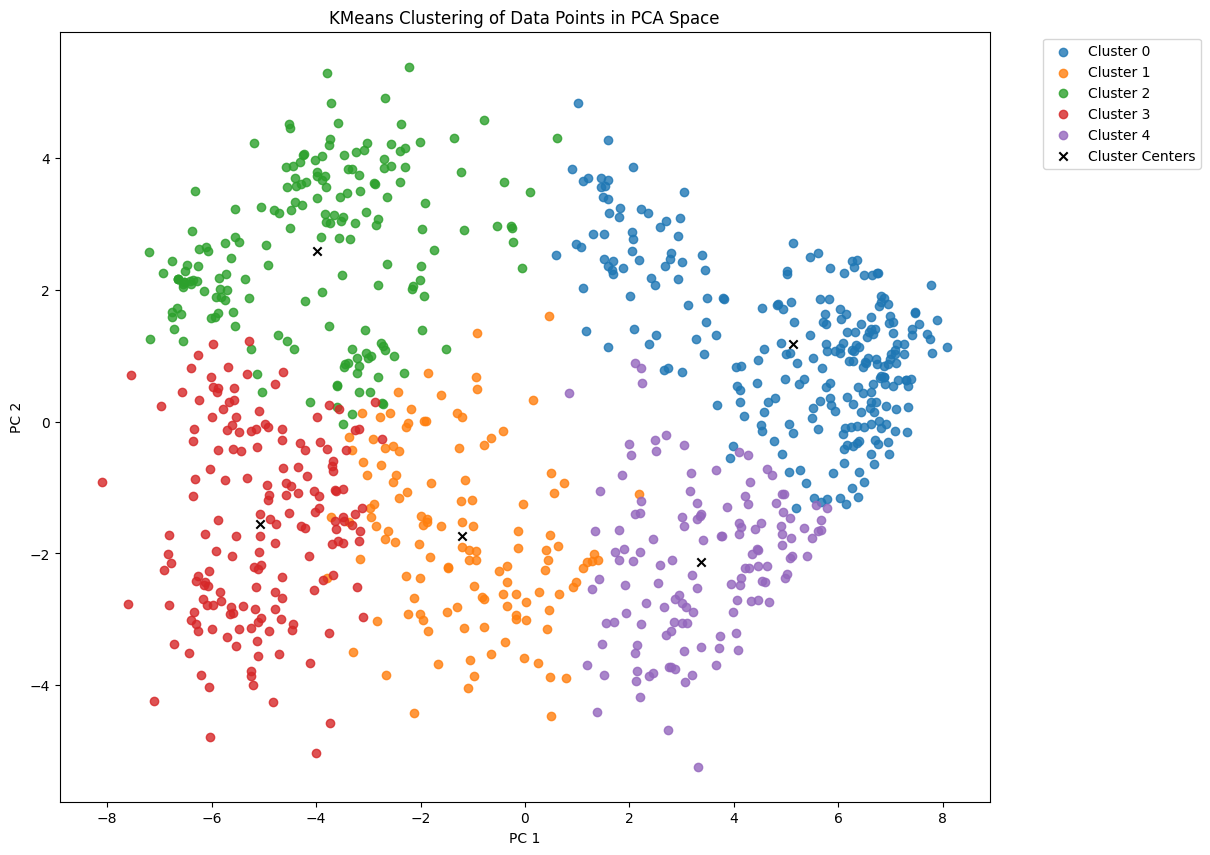

In [13]:
kmeans = KMeans(n_clusters=5, random_state=501)
kmeans.fit_predict(data_transformed)

labels = kmeans.predict(data_transformed)
plt.figure(figsize=(12, 10))
for label in range(5): 
    cluster_data = data_transformed[labels == label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {label}', alpha=0.8)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='black', label='Cluster Centers')

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('KMeans Clustering of Data Points in PCA Space')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Hierarchical Clustering

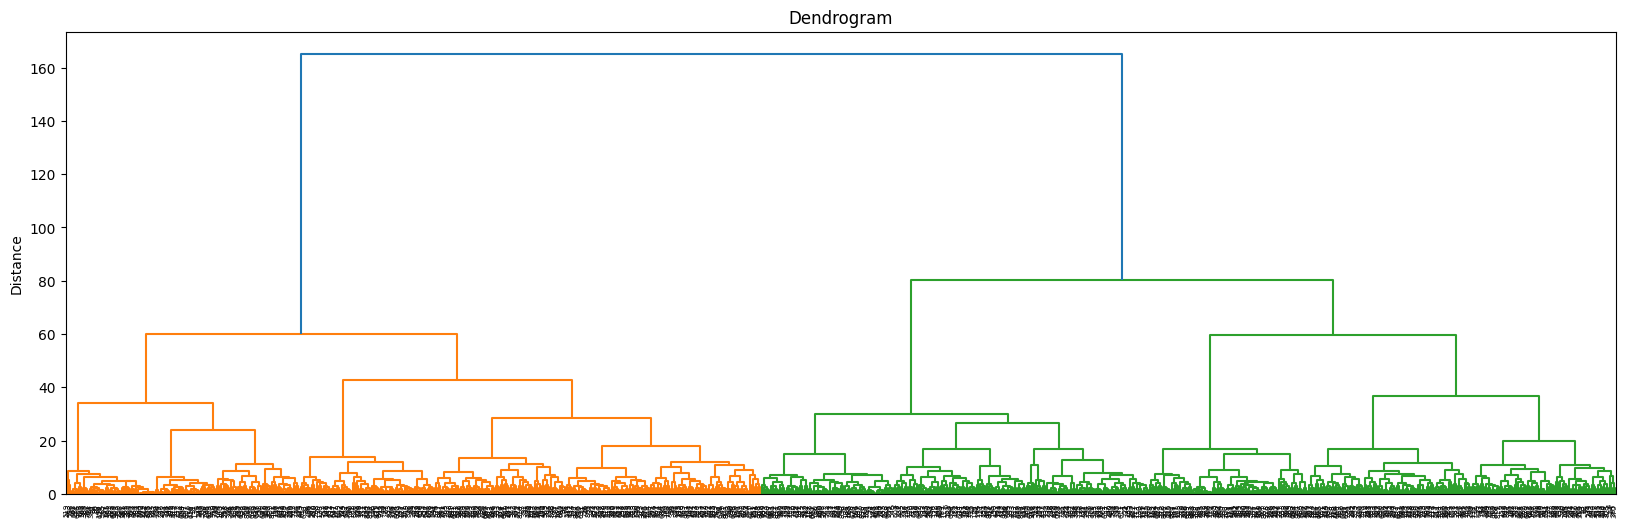

In [14]:
from scipy.cluster.hierarchy import dendrogram, ward, linkage

linkage_array = ward(data_transformed) 

plt.figure(figsize=(20, 6))

dendrogram(linkage_array)

plt.ylabel('Distance')
plt.title('Dendrogram')

plt.show()

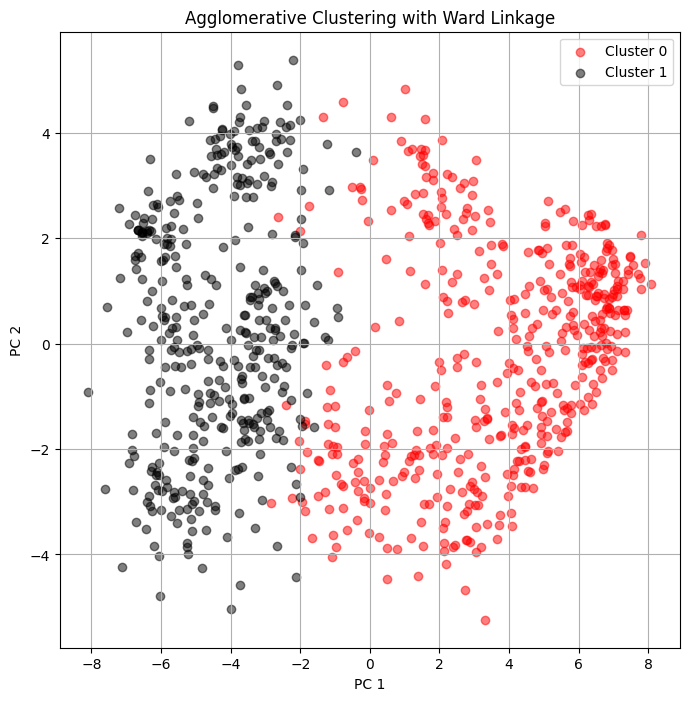

In [15]:
agg = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels = agg.fit_predict(data_transformed)

colors = ['red', 'black']

plt.figure(figsize=(8, 8))
for cluster_label in np.unique(labels):
    cluster_data = data_transformed[labels == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[cluster_label], label=f'Cluster {cluster_label}', alpha=0.5)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Agglomerative Clustering with Ward Linkage')
plt.legend()
plt.grid(True)
plt.show()

# DBScan

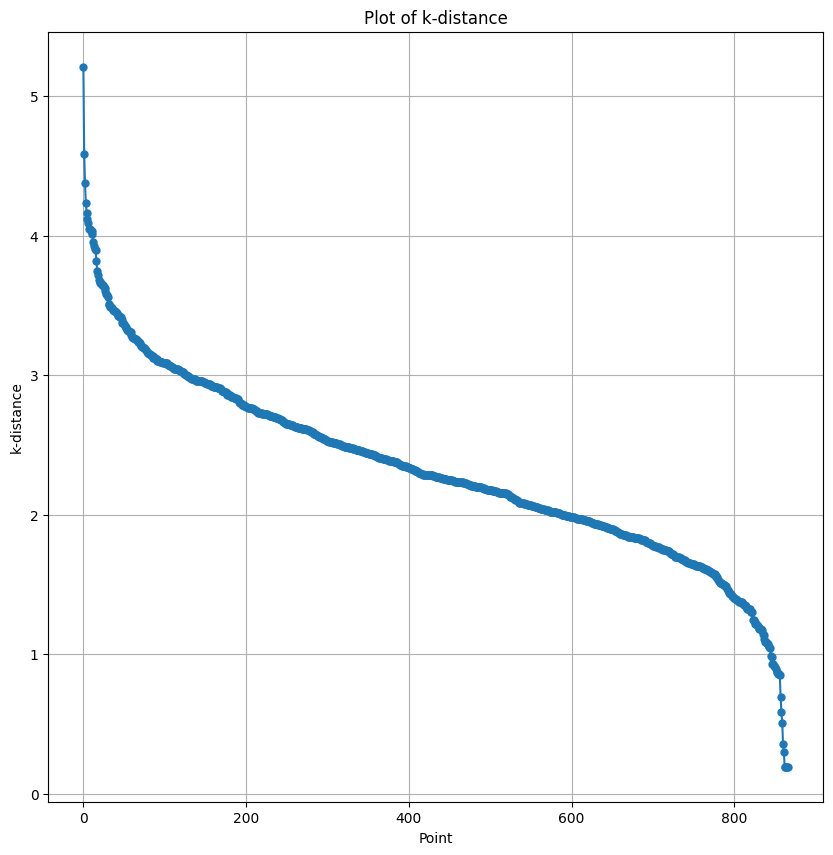

In [16]:
from sklearn.neighbors import NearestNeighbors

k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(data_transformed)
distances, indices = neighbors_fit.kneighbors(data_transformed)
k_distances = np.sort(distances[:, k-1])[::-1]

plt.figure(figsize=(10, 10))

plt.plot(range(len(data_transformed)), k_distances, '.-', markersize=10)
plt.xlabel('Point')
plt.ylabel('k-distance')
plt.title('Plot of k-distance')

plt.grid(True)
plt.show()

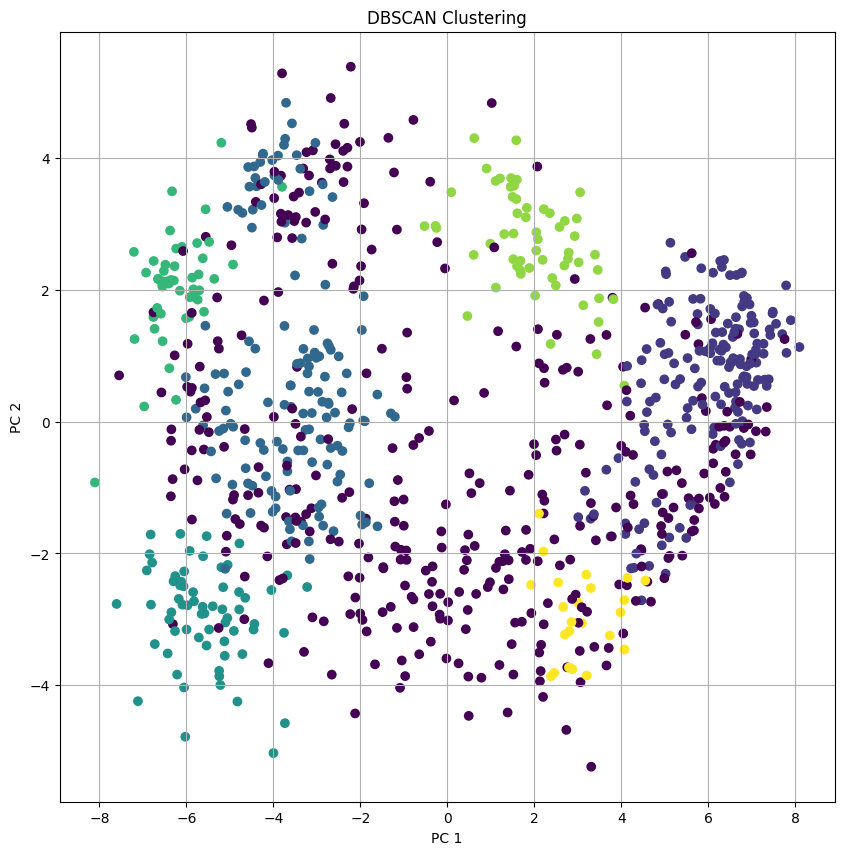

In [17]:
dbscan = DBSCAN(eps=2.6, min_samples=20)
labels = dbscan.fit_predict(data_transformed)

plt.figure(figsize=(10, 10))
plt.scatter(data_transformed[:, 0], data_transformed[:, 1], c=labels)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('DBSCAN Clustering')
plt.grid(True)
plt.show()